In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
train=pd.read_csv('/kaggle/input/playground-series-s5e4/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s5e4/test.csv')
# Drop all duplicates in the train DataFrame
train = train.drop_duplicates()
train.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


<Axes: >

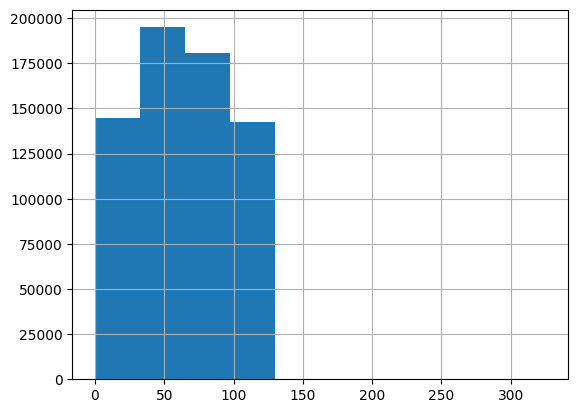

In [3]:
train['Episode_Length_minutes'].hist()

<Axes: >

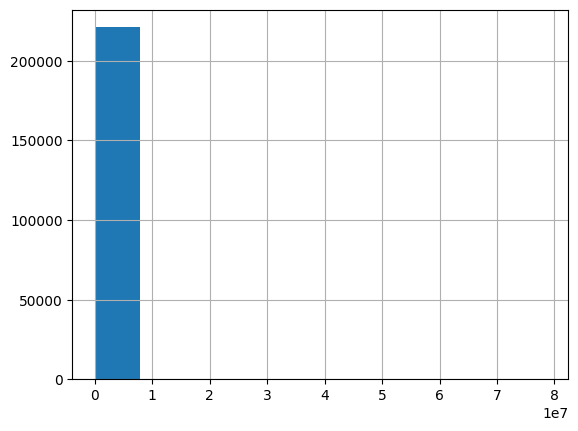

In [4]:
test['Episode_Length_minutes'].hist()

In [5]:
train.max()

id                                  749999
Podcast_Name                   World Watch
Episode_Title                   Episode 99
Episode_Length_minutes              325.24
Genre                           True Crime
Host_Popularity_percentage          119.46
Publication_Day                  Wednesday
Publication_Time                     Night
Guest_Popularity_percentage         119.91
Number_of_Ads                       103.91
Episode_Sentiment                 Positive
Listening_Time_minutes              119.97
dtype: object

In [6]:
test.max()

id                                  999999
Podcast_Name                   World Watch
Episode_Title                   Episode 99
Episode_Length_minutes          78486264.0
Genre                           True Crime
Host_Popularity_percentage          117.76
Publication_Day                  Wednesday
Publication_Time                     Night
Guest_Popularity_percentage         116.82
Number_of_Ads                       2063.0
Episode_Sentiment                 Positive
dtype: object

In [7]:
test.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral
1,750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral
2,750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive
3,750003,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive
4,750004,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral


In [8]:
numerical_columns=['Episode_Length_minutes','Host_Popularity_percentage','Guest_Popularity_percentage']
categorical_columns = [col for col in test.columns if col not in numerical_columns]
categorical_columns.remove('id')
print(categorical_columns)

['Podcast_Name', 'Episode_Title', 'Genre', 'Publication_Day', 'Publication_Time', 'Number_of_Ads', 'Episode_Sentiment']


In [9]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # 25th percentile
        Q3 = df[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile range
        
        # Define the acceptable range
        lower_bound = Q1 - 2.5 * IQR
        upper_bound = Q3 + 2.5 * IQR
        
        # Replace outliers with NaN
        df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = np.nan

    return df

# Apply function to remove outliers
train = remove_outliers(train, numerical_columns)
test = remove_outliers(test, numerical_columns)
test.info()

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: Ru

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           250000 non-null  int64  
 1   Podcast_Name                 250000 non-null  object 
 2   Episode_Title                250000 non-null  object 
 3   Episode_Length_minutes       221262 non-null  float64
 4   Genre                        250000 non-null  object 
 5   Host_Popularity_percentage   250000 non-null  float64
 6   Publication_Day              250000 non-null  object 
 7   Publication_Time             250000 non-null  object 
 8   Guest_Popularity_percentage  201168 non-null  float64
 9   Number_of_Ads                250000 non-null  float64
 10  Episode_Sentiment            250000 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 21.0+ MB


In [10]:
train.isna().sum()

id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87094
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662906 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


In [12]:
for col in categorical_columns:
    train[col].fillna(train[col].mode()[0], inplace=True)  # Fill with mode
    test[col].fillna(test[col].mode()[0], inplace=True)  # Fill with mode

for col in numerical_columns:
    train[col].fillna(train[col].mean(), inplace=True)  # Fill with mean
    test[col].fillna(test[col].mean(), inplace=True)  # Fill with mean
train.info()

<ipython-input-12-957724fa5e35>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].mode()[0], inplace=True)  # Fill with mode
<ipython-input-12-957724fa5e35>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       750000 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  750000 non-null  float64
 9   Number_of_Ads                750000 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


<ipython-input-12-957724fa5e35>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].mean(), inplace=True)  # Fill with mean
<ipython-input-12-957724fa5e35>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [13]:
train[numerical_columns].corr()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage
Episode_Length_minutes,1.000000,0.022185,-0.008249
Host_Popularity_percentage,0.022185,1.000000,0.020111
Guest_Popularity_percentage,-0.008249,0.020111,1.000000


In [14]:
# Ensure that the columns are in the same order in both train and test datasets
# Sort the columns in both the train and test data by column names (or by column index), which guarantees that they match:
train = train[sorted(train.columns)]  # Sort columns of train data
test = test[sorted(test.columns)]    # Sort columns of test data

In [15]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

# Initialize scalers and encoders
scaler = StandardScaler()
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Fit and transform on the training data
df_numerical_scaled_train = pd.DataFrame(scaler.fit_transform(train[numerical_columns]), columns=numerical_columns)
df_categorical_encoded_train = pd.DataFrame(encoder.fit_transform(train[categorical_columns]))
df_categorical_encoded_train.columns = encoder.get_feature_names_out(categorical_columns)

# Now, transform the test data using the statistics learned from the training data
df_numerical_scaled_test = pd.DataFrame(scaler.transform(test[numerical_columns]), columns=numerical_columns)
df_categorical_encoded_test = pd.DataFrame(encoder.transform(test[categorical_columns]))
df_categorical_encoded_test.columns = encoder.get_feature_names_out(categorical_columns)

# Combine the scaled and encoded data
train_transformed = pd.concat([df_numerical_scaled_train, df_categorical_encoded_train], axis=1)
test_transformed = pd.concat([df_numerical_scaled_test, df_categorical_encoded_test], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [16]:
train_transformed.head()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Podcast_Name_Athlete's Arena,Podcast_Name_Brain Boost,Podcast_Name_Business Briefs,Podcast_Name_Business Insights,Podcast_Name_Comedy Corner,Podcast_Name_Crime Chronicles,Podcast_Name_Criminal Minds,...,Number_of_Ads_53.37,Number_of_Ads_53.42,Number_of_Ads_103.0,Number_of_Ads_103.25,Number_of_Ads_103.75,Number_of_Ads_103.88,Number_of_Ads_103.91,Episode_Sentiment_Negative,Episode_Sentiment_Neutral,Episode_Sentiment_Positive
0,0.000000,0.653611,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.784031,0.309976,0.928792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.303137,0.442009,-1.694624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.086003,-0.115415,1.036502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.484303,0.883576,0.252376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
test_transformed.head()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Podcast_Name_Athlete's Arena,Podcast_Name_Brain Boost,Podcast_Name_Business Briefs,Podcast_Name_Business Insights,Podcast_Name_Comedy Corner,Podcast_Name_Crime Chronicles,Podcast_Name_Criminal Minds,...,Number_of_Ads_53.37,Number_of_Ads_53.42,Number_of_Ads_103.0,Number_of_Ads_103.25,Number_of_Ads_103.75,Number_of_Ads_103.88,Number_of_Ads_103.91,Episode_Sentiment_Negative,Episode_Sentiment_Neutral,Episode_Sentiment_Positive
0,0.466390,-0.950895,0.042831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.181952,0.499718,-0.001710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.148272,0.351072,1.773236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.641749,-1.594009,-0.019053,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.252160,-0.076942,-1.603364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
!pip install keras-tuner

In [19]:
from kerastuner.tuners import RandomSearch
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
# Assuming you have a DataFrame `df` with features in `X` and target in `y`
X = train_transformed  # replace with your feature columns
y = train['Listening_Time_minutes']  # replace with your target column

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

def build_model(hp):
    model = Sequential()
    
    # First hidden layer
    model.add(Dense(
        units=hp.Int('units_1', min_value=256, max_value=1024, step=256),
        activation='relu',
        input_dim=X_train.shape[1],
        kernel_regularizer=l2(hp.Float('l2_1', 1e-3, 1e-2, sampling='LOG'))
    ))
    model.add(Dropout(hp.Float('dropout_1', 0.2, 0.3, step=0.1)))
    
    # Second hidden layer
    model.add(Dense(
        units=hp.Int('units_2', min_value=256, max_value=512, step=128),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_2', 1e-3, 1e-2, sampling='LOG'))
    ))
    
    # Output layer
    model.add(Dense(1))

    # Optimizer with tunable learning rate
    optimizer = Adam(
        learning_rate=hp.Float('learning_rate', 1e-3, 1e-3, sampling='LOG')
    )
    
    model.compile(optimizer=optimizer, loss='mse')
    return model


tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=1,
    directory='tuner_dir',
    project_name='regression_dnn'
)

<ipython-input-19-398708f80ff9>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

tuner.search(
    X_train, y_train,
    epochs=25,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

Trial 2 Complete [00h 38m 20s]
val_loss: 175.57521057128906

Best val_loss So Far: 175.57521057128906
Total elapsed time: 00h 59m 51s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
1024              |768               |units_1
0.0041477         |0.0031916         |l2_1
0.2               |0.2               |dropout_1
384               |256               |units_2
0.004775          |0.0026156         |l2_2
0.001             |0.001             |learning_rate



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 131s 7ms/step - loss: 206.5044 - val_loss: 178.9979
Epoch 2/25
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 134s 7ms/step - loss: 182.4679 - val_loss: 183.6613
Epoch 3/25
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 128s 7ms/step - loss: 181.8977 - val_loss: 176.9367
Epoch 4/25
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 120s 6ms/step - loss: 181.7936 - val_loss: 176.7163
Epoch 5/25
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 124s 7ms/step - loss: 180.6552 - val_loss: 182.6652
Epoch 6/25
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 123s 7ms/step - loss: 181.5261 - val_loss: 180.4743
Epoch 7/25
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 122s 7ms/step - loss: 180.7783 - val_loss: 176.4417
Epoch 8/25
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 117s 6ms/step - loss: 179.5212 - val_loss: 176.6776
Epoch 9/25
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 117s 6ms/step - loss: 181.0363 - val_loss: 178.8882
Epoch 10/25
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 121s 6ms/step - loss: 180.3147 - val_loss: 177.0901
Epoch 11/25
18750/18750 ━━━━━━━━━━━━━━━

KeyboardInterrupt: 

In [21]:
model = tuner.get_best_models(1)[0]

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [22]:
predictions = model.predict(test_transformed)

7813/7813 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step


In [23]:
predictions.flatten()

array([53.332756, 19.221207, 49.4193  , ...,  8.050437, 78.842865,
       55.895557], dtype=float32)

In [24]:
# Submission file
submission = pd.DataFrame({'id': test['id'], 'Listening_Time_minutes': predictions.flatten()})
submission.to_csv('submission.csv', index=False)

print("✅ Submission file created successfully!")

✅ Submission file created successfully!


In [25]:
submission.head()

,id,Listening_Time_minutes
0,750000,53.332756
1,750001,19.221207
2,750002,49.419300
3,750003,83.256165
4,750004,50.396915


Epoch 1/5
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 99s 5ms/step - loss: 180.4041 - val_loss: 177.4873
Epoch 2/5
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 98s 5ms/step - loss: 178.7410 - val_loss: 175.7197
Epoch 3/5
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 99s 5ms/step - loss: 178.6209 - val_loss: 175.9909
Epoch 4/5
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 96s 5ms/step - loss: 178.2810 - val_loss: 176.2496
Epoch 5/5
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 100s 5ms/step - loss: 178.4567 - val_loss: 175.6811


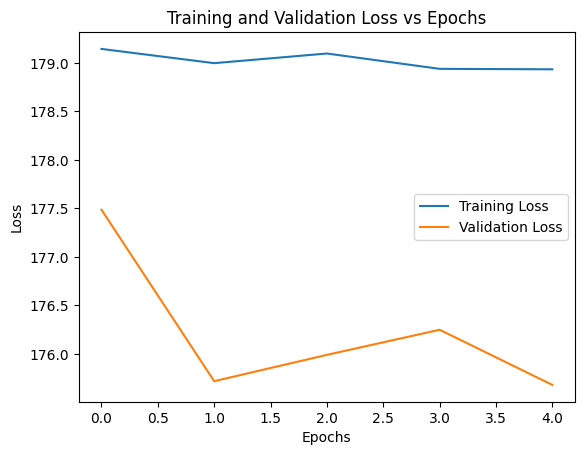

In [27]:
history = model.fit(
    X_train, y_train, 
    epochs=5, 
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],  # Using early stopping
    verbose=1
)

# Plot training and validation loss vs epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss vs Epochs')
plt.show()

In [29]:
submission['Listening_Time_minutes'].max()

105.95758819580078

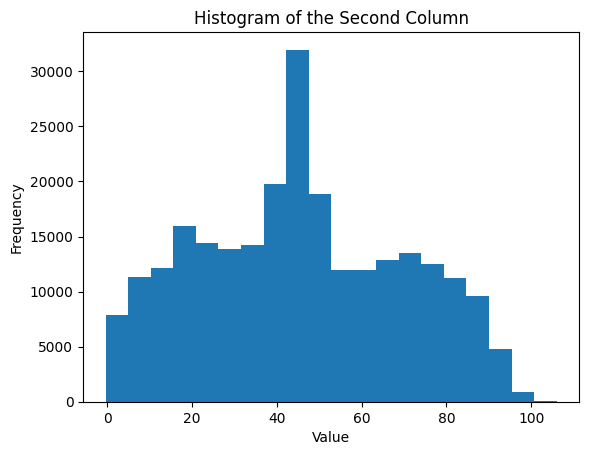

In [30]:
import matplotlib.pyplot as plt

# Assuming your dataframe is called 'df'
plt.hist(submission['Listening_Time_minutes'], bins=20)  # iloc[:, 1] selects the second column
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of the Second Column')
plt.show()
